In [55]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.stats import norm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [58]:
df=pd.read_csv(r'final.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,o,f,e,w,16.53,17.20,w,t,p,d,w


In [59]:
df.shape

(61069, 14)

In [60]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [61]:
features=["ring-type", "stem-width", "cap-shape", "gill-attachment", "stem-color", "gill-color", "stem-height","stem-width", "stem-height"]
prediction=['class']

In [62]:
X=df[features]
y=df[prediction]

#### Train Test Split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

###  Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

C:\Users\Jerrick\AppData\Local\Temp/ipykernel_24320/1235016856.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [65]:
print("Random Forest Classifier ACCURACY:",metrics.accuracy_score(y_test,y_pred))

Random Forest Classifier ACCURACY: 0.9901752087768135


In [66]:
print("Random Forest Classifier:\n",metrics.classification_report(y_test,y_pred))

Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8155
           1       0.99      0.99      0.99     10166

    accuracy                           0.99     18321
   macro avg       0.99      0.99      0.99     18321
weighted avg       0.99      0.99      0.99     18321



In [75]:
model = RandomForestClassifier(max_depth=2, n_estimators=30,min_samples_split=3, max_leaf_nodes=5,random_state=22)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Training Accuracy : ',metrics.accuracy_score(y_train,model.predict(X_train))*100)
print('Validation Accuracy : ',metrics.accuracy_score(y_test,model.predict(X_test))*100)

C:\Users\Jerrick\AppData\Local\Temp/ipykernel_24320/2232334580.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training Accuracy :  63.77374380087958
Validation Accuracy :  63.4899841711697


In [76]:
print("Random Forest Classifier:\n",metrics.classification_report(y_test,y_pred))

Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.58      0.65      0.61      8155
           1       0.69      0.63      0.66     10166

    accuracy                           0.63     18321
   macro avg       0.63      0.64      0.63     18321
weighted avg       0.64      0.63      0.64     18321



[[5269 2886]
 [3803 6363]]


<AxesSubplot:>

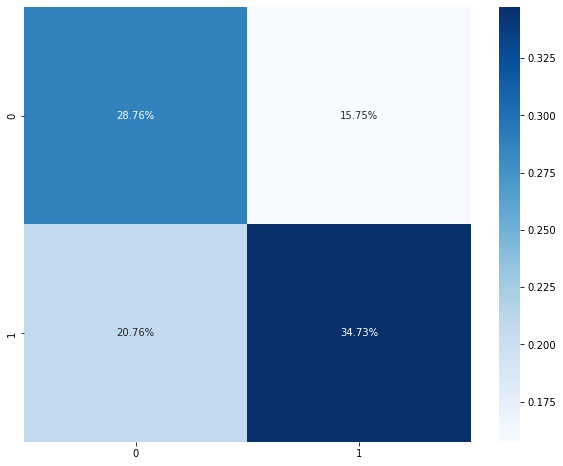

In [77]:
cf_mat = confusion_matrix(y_test, y_pred)
print(cf_mat)
sns.heatmap(cf_mat/np.sum(cf_mat), annot=True, 
            fmt='.2%', cmap='Blues')

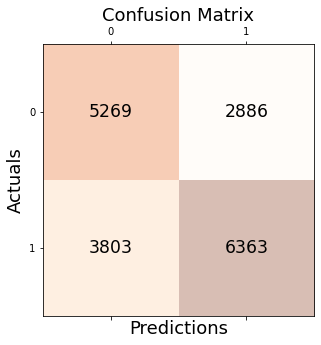

In [78]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

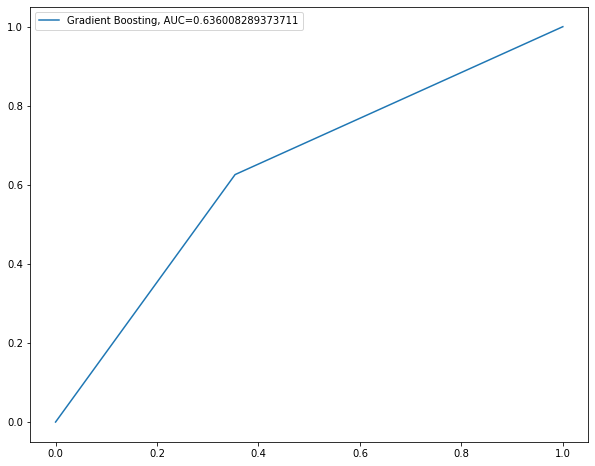

In [79]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

plt.legend()

### AUC - ROC Curve

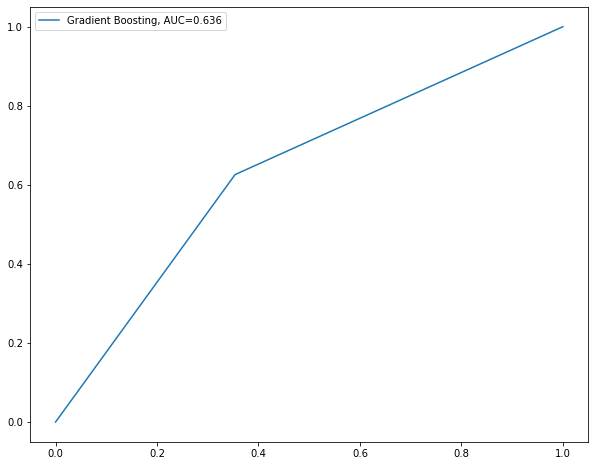

In [80]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()